# Generative Adversarial Networks (GANS)

- GANs were first reported on in 2014 from Ian Goodfellow and others in Yoshua Bengio's lab. Since then, GANs have exploded in popularity. 
- Generative Adversarial Networks belong to the set of generative models. It means that they are able to produce / to generate (we’ll see how) new content. 
<figure>
<center>
<img src='https://miro.medium.com/max/1400/1*M1Z5nRbI4Cb7XirMKTkNdg.png' />
<figcaption>Image Caption</figcaption></center>
</figure>

**Examples of GAN models available online:**
- [Pix2Pix GAN](https://affinelayer.com/pixsrv/)  
- [This Person does not exist](https://thispersondoesnotexist.com)
- [Cycle GAN an Pix2Pix Jun-Yan Zhu](https://github.com/junyanz/pytorch-CycleGAN-and-pix2pix)
- [A list of generative models Wise Odd](https://github.com/wiseodd/generative-models)


### The idea behind GANs
<figure>
<center>
<img src='https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/gan-mnist/assets/gan_pipeline.png' />
<figcaption>Image Caption</figcaption></center>
</figure>

The idea behind GANs is that you have two networks, a generator $G$ and a discriminator $D$, competing against each other. 

- The **generator** makes "fake" data to pass to the **discriminator**. 

- The **discriminator** also sees real training data and predicts if the data it's received is real or fake.

- The **generator** is trained to fool the **discriminator**, it wants to output data that looks as close as possible to real, training data.

- The **discriminator** is a classifier that is trained to figure out which data is real and which is fake.

What ends up happening is that the **generator** learns to make data that is indistinguishable from real data to the **discriminator**.

- A latent sample *(As shown in the image above)* is a random vector that the generator uses to construct its fake images. 
- This is often called a latent vector and that vector space is called latent space. As the generator trains, it figures out how to map latent vectors to recognizable images that can fool the discriminator.

`If you're interested in generating only new images, you can throw out the discriminator after training.`

Quite Intutive yea? But how does this intution translate to mathematics and codes?


#### **Next item has source from** [Joseph Rocca](https://towardsdatascience.com/understanding-generative-adversarial-networks-gans-cd6e4651a29)

**The ideal case: perfect generator and discriminator**
`direct intutive approach`
- Training a generator to fool a discriminator invariably means, trying to training the generator to match the target distribution ot the images.

- Suppose that we have a true distribution, for example a one dimensional gaussian, and that we want a generator that samples from this probability distribution. 

- The idea is that we want a training method would then consist in adjusting iteratively the generator (gradient descent iterations) to correct the measured difference/error between true and generated distributions. 

- Finally, assuming the optimisation process perfect, we should end up with the generated distribution that matches exactly the true distribution. This is a direct approach to solving the problem.

<figure>
<center>
<img src='https://miro.medium.com/max/1400/1*3XAUCz6o2DZlGHVsovvRIQ.jpeg' />
<figcaption>Image Caption</figcaption></center>
</figure>

For the `“indirect” approach`, we have to consider also a discriminator. 

- We assume for now that this discriminator is a kind of oracle that knows exactly what are the true and generated distribution and that is able, based on this information, to predict a class (“true” or “generated”) for any given point. 

- If the two distributions are far appart, the discriminator will be able to classify easily and with a high level of confidence most of the points we present to it. 

- If we want to fool the discriminator, we have to bring the generated distribution close to the true one. 

- The discriminator will have the most difficulty to predict the class when the two distributions will be equal in all points: in this case, for each point there are equal chances for it to be “true” or “generated” and then the discriminator can’t do better than being true in one case out of two in average.

<figure>
<center>
<img src='https://miro.medium.com/max/1400/1*5PUywl6tcsHpQ1Co6P92lA.jpeg' />
<figcaption>Image Caption</figcaption></center>
</figure>

#### **The approximation: adversarial neural networks**
Let’s now describe the specific form that take the generator and the discriminator in the GANs architecture. 
- The generator is a neural network that models a transform function. 
- It takes as input a simple random variable and must return, once trained, a random variable that follows the targeted distribution. 
- As it is very complicated and unknown, we decide to model the discriminator with another neural network. 
- This neural network models a discriminative function. It takes as input a point (in our dog example a N dimensional vector) and returns as output the probability of this point to be a “true” one.

Once defined, the two networks can then be trained jointly (at the same time) with opposite goals :

- the goal of the generator is to fool the discriminator, so the generative neural network is trained to maximise the final classification error (between true and generated data)
- the goal of the discriminator is to detect fake generated data, so the discriminative neural network is trained to minimise the final classification error

So, at each iteration of the training process, the weights of the generative network are updated in order to increase the classification error (error gradient ascent over the generator’s parameters) whereas the weights of the discriminative network are updated so that to decrease this error (error gradient descent over the discriminator’s parameters).

#### **The loss function**
Let’s take now a closer look at the “theoretical” loss function of GANs. If we send to the discriminator “true” and “generated” data in the same proportions, the expected absolute error of the discriminator can then be expressed as

<figure>
<center>
<img src='https://miro.medium.com/max/1400/1*v1P8gE2sinZZi7VQ5IAAOg@2x.png' />
<figcaption>Image Caption</figcaption></center>
</figure>

The goal of the generator is to fool the discriminator whose goal is to be able to distinguish between true and generated data. So, when training the generator, we want to maximise this error while we try to minimise it for the discriminator. It gives us

<figure>
<center>
<img src='https://miro.medium.com/max/668/1*fXqro29g72vApho_k2ysVw@2x.png' />
<figcaption>Image Caption</figcaption></center>
</figure>

## MNIST Dataset


In [0]:
%matplotlib inline

import numpy as np
import torch
import matplotlib.pyplot as plt

In [0]:

from torchvision import datasets
import torchvision.transforms as transforms

# number of subprocesses to use for data loading
num_workers = 0
# how many samples per batch to load
batch_size = 64

# convert data to torch.FloatTensor
transform = transforms.ToTensor()

# get the training datasets
train_data = datasets.MNIST(root='data', train=True,
                                   download=True, transform=transform)

# prepare data loader
train_loader = torch.utils.data.DataLoader(train_data, batch_size=batch_size,
                                           num_workers=num_workers)

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw
Processing...
Done!


/pytorch/torch/csrc/utils/tensor_numpy.cpp:141: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program.


`num_workers` is not related to `batch_size`. Say you set `batch_size` to 20 and the training size is 2000, then each epoch would contain 100 iterations, i.e. for each iteration, the data loader returns a batch of 20 instances. `num_workers > 0` is used to preprocess batches of data so that the next batch is ready for use when the current batch has been finished. More num_workers would consume more memory usage but is helpful to speed up the I/O process. Please refer to this thread 1.6k for more discussions on this problem. [source](https://discuss.pytorch.org/t/relation-between-num-workers-batch-size-and-epoch-in-dataloader/18201)

### Visualize the data

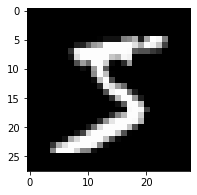

In [0]:
# obtain one batch of training images
dataiter = iter(train_loader)
images, labels = dataiter.next()
images = images.numpy()

# get one image from the batch
img = np.squeeze(images[0])

fig = plt.figure(figsize = (3,3)) 
ax = fig.add_subplot(111)
ax.imshow(img, cmap='gray')

## Define the Model
A GAN is comprised of two adversarial networks, a discriminator and a generator.

### Discriminator

The discriminator network is going to be a pretty typical linear classifier. To make this network a universal function approximator, we'll need at least one hidden layer, and these hidden layers should have one key attribute:

- All hidden layers will have a [Leaky ReLu](https://pytorch.org/docs/stable/nn.html#torch.nn.LeakyReLU) activation function applied to their outputs.
    
<img src='https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/gan-mnist/assets/gan_network.png' width=70% />

#### Leaky ReLu
We should use a leaky ReLU to allow gradients to flow backwards through the layer unimpeded. A leaky ReLU is like a normal ReLU, except that there is a small non-zero output for negative input values.

<img src='https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/gan-mnist/assets/leaky_relu.png' width=40% />

#### Sigmoid Output
We'll also take the approach of using a more numerically stable loss function on the outputs. Recall that we want the discriminator to output a value 0-1 indicating whether an image is real or fake.
- We will ultimately use [BCEWithLogitsLoss](https://pytorch.org/docs/stable/nn.html#bcewithlogitsloss), which combines a sigmoid activation function and and binary cross entropy loss in one function.

So, our final output layer should not have any activation function applied to it.

In [0]:
import torch.nn as nn
import torch.nn.functional as F

class Discriminator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Discriminator, self).__init__()
        
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim*4)
        self.fc2 = nn.Linear(hidden_dim*4, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim)
        
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim, output_size)
        
        # dropout layer 
        self.dropout = nn.Dropout(0.3)
        
        
    def forward(self, x):
        # flatten image
        x = x.view(-1, 28*28)
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2) # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # final layer
        out = self.fc4(x)

        return out

In [0]:
class Generator(nn.Module):

    def __init__(self, input_size, hidden_dim, output_size):
        super(Generator, self).__init__()
        
        # define hidden linear layers
        self.fc1 = nn.Linear(input_size, hidden_dim)
        self.fc2 = nn.Linear(hidden_dim, hidden_dim*2)
        self.fc3 = nn.Linear(hidden_dim*2, hidden_dim*4)
        
        # final fully-connected layer
        self.fc4 = nn.Linear(hidden_dim*4, output_size)
        
        # dropout layer 
        self.dropout = nn.Dropout(0.3)

    def forward(self, x):
        # all hidden layers
        x = F.leaky_relu(self.fc1(x), 0.2) # (input, negative_slope=0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc2(x), 0.2)
        x = self.dropout(x)
        x = F.leaky_relu(self.fc3(x), 0.2)
        x = self.dropout(x)
        # final layer with tanh applied
        out = F.tanh(self.fc4(x))

        return out

### Lets define the hyper parameters

In [0]:
# Discriminator hyperparams

# Size of input image to discriminator (28*28)
input_size = 784
# Size of discriminator output (real or fake)
d_output_size = 1
# Size of last hidden layer in the discriminator
d_hidden_size = 32

# Generator hyperparams

# Size of latent vector to give to generator
z_size = 100
# Size of generator output (generated image)
g_output_size = 784
# Size of first hidden layer in the generator
g_hidden_size = 32

### Build complete network
Now we're instantiating the discriminator and generator from the classes defined above. Make sure you've passed in the correct input arguments.

In [0]:
# instantiate discriminator and generator
D = Discriminator(input_size, d_hidden_size, d_output_size)
G = Generator(z_size, g_hidden_size, g_output_size)

# check that they are as you expect
print(D)
print()
print(G)

Discriminator(
  (fc1): Linear(in_features=784, out_features=128, bias=True)
  (fc2): Linear(in_features=128, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=32, bias=True)
  (fc4): Linear(in_features=32, out_features=1, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)

Generator(
  (fc1): Linear(in_features=100, out_features=32, bias=True)
  (fc2): Linear(in_features=32, out_features=64, bias=True)
  (fc3): Linear(in_features=64, out_features=128, bias=True)
  (fc4): Linear(in_features=128, out_features=784, bias=True)
  (dropout): Dropout(p=0.3, inplace=False)
)


In [0]:
train_on_gpu = torch.cuda.is_available()

if train_on_gpu:
    # move models to GPU
    G.cuda()
    D.cuda()
    print('GPU available for training. Models moved to GPU')
else:
    print('Training on CPU.')

GPU available for training. Models moved to GPU


## Discriminator and Generator Losses
Now we need to calculate the losses.
### Discriminator Losses
- For the discriminator, the total loss is the sum of the losses for real and fake images, `d_loss = d_real_loss + d_fake_loss`.
- Remember that we want the discriminator to output 1 for real images and 0 for fake images, so we need to set up the losses to reflect that.

<figure>
<center>
<img src='https://raw.githubusercontent.com/udacity/deep-learning-v2-pytorch/master/gan-mnist/assets/gan_pipeline.png' />
<figcaption>Image Caption</figcaption></center>
</figure>

The losses will by binary cross entropy loss with logits, which we can get with BCEWithLogitsLoss. This combines a sigmoid activation function `and` and binary cross entropy loss in one function.

For the real images, we want `D(real_images) = 1`. That is, we want the discriminator to classify the the real images with a label = 1, indicating that these are real. To help the discriminator generalize better, the labels are **reduced a bit from 1.0 to 0.9**. For this, we'll use the parameter smooth; if True, then we should smooth our labels. In PyTorch, this looks like `labels = torch.ones(size) * 0.9`

The discriminator loss for the fake data is similar. We want `D(fake_images) = 0`, where the fake images are the generator output, `fake_images = G(z)`.

### Generator Loss
The generator loss will look similar only with flipped labels. The generator's goal is to get `D(fake_images) = 1`. In this case, the labels are **flipped** to represent that the generator is trying to fool the discriminator into thinking that the images it generates (fakes) are real!

In [0]:
# Calculate losses
def real_loss(D_out, smooth=False):
    batch_size = D_out.size(0)
    # label smoothing
    if smooth:
        # smooth, real labels = 0.9
        labels = torch.ones(batch_size)*0.9
    else:
        labels = torch.ones(batch_size) # real labels = 1
    # move labels to GPU if available     
    if train_on_gpu:
        labels = labels.cuda()
    # numerically stable loss
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

def fake_loss(D_out):
    batch_size = D_out.size(0)
    labels = torch.zeros(batch_size) # fake labels = 0
    # move labels to GPU if available     
    if train_on_gpu:
        labels = labels.cuda()
    criterion = nn.BCEWithLogitsLoss()
    # calculate loss
    loss = criterion(D_out.squeeze(), labels)
    return loss

## Optimizers
We want to update the generator and discriminator variables separately. So, we'll define two separate Adam optimizers.

In [0]:
import torch.optim as optim

# Optimizers
lr = 0.002

# Create optimizers for the discriminator and generator
d_optimizer = optim.Adam(D.parameters(), lr)
g_optimizer = optim.Adam(G.parameters(), lr)


## Training
Training will involve alternating between training the discriminator and the generator. We'll use our functions real_loss and fake_loss to help us calculate the discriminator losses in all of the following cases.

### Discriminator training
1. Compute the discriminator loss on real, training images
2. Generate fake images
3. Compute the discriminator loss on fake, generated images
4. Add up real and fake loss
5. Perform backpropagation + an optimization step to update the discriminator's weights
### Generator training
1. Generate fake images
2. Compute the discriminator loss on fake images, using **flipped** labels!
3. Perform backpropagation + an optimization step to update the generator's weights

#### Saving Samples
As we train, we'll also print out some loss statistics and save some generated "fake" samples.

In [0]:
import pickle as pkl

# training hyperparams
num_epochs = 100

# keep track of loss and generated, "fake" samples
samples = []
losses = []

print_every = 400

# Get some fixed data for sampling. These are images that are held
# constant throughout training, and allow us to inspect the model's performance
sample_size=16
fixed_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
fixed_z = torch.from_numpy(fixed_z).float()

# train the network
D.train()
G.train()
for epoch in range(num_epochs):
    
    for batch_i, (real_images, _) in enumerate(train_loader):
                
        batch_size = real_images.size(0)
        
        ## Important rescaling step ## 
        real_images = real_images*2 - 1  # rescale input images from [0,1) to [-1, 1)
        
        # ============================================
        #            TRAIN THE DISCRIMINATOR
        # ============================================
        
        d_optimizer.zero_grad()
        
        # 1. Train with real images

        # Compute the discriminator losses on real images 
        if train_on_gpu:
            real_images = real_images.cuda()

        # smooth the real labels
        D_real = D(real_images)
        d_real_loss = real_loss(D_real, smooth=True)
        
        # 2. Train with fake images
        
        # Generate fake images
        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        if train_on_gpu:
          z = z.cuda()
        fake_images = G(z)
        
        # Compute the discriminator losses on fake images        
        D_fake = D(fake_images)
        d_fake_loss = fake_loss(D_fake)
        
        # add up loss and perform backprop
        d_loss = d_real_loss + d_fake_loss
        d_loss.backward()
        d_optimizer.step()
        
        
        # =========================================
        #            TRAIN THE GENERATOR
        # =========================================
        g_optimizer.zero_grad()
        
        # 1. Train with fake images and flipped labels
        
        # Generate fake images
        z = np.random.uniform(-1, 1, size=(batch_size, z_size))
        z = torch.from_numpy(z).float()
        # move z to GPU, if available
        if train_on_gpu:
          z = z.cuda()
        fake_images = G(z)
        
        # Compute the discriminator losses on fake images 
        # using flipped labels!
        D_fake = D(fake_images)
        g_loss = real_loss(D_fake) # use real loss to flip labels
        
        # perform backprop
        g_loss.backward()
        g_optimizer.step()

    print('Epoch [{:5d}/{:5d}] | d_loss: {:6.4f} | g_loss: {:6.4f}'.format(
                epoch+1, num_epochs, d_loss.item(), g_loss.item()))

    
    ## AFTER EACH EPOCH##
    # append discriminator loss and generator loss
    losses.append((d_loss.item(), g_loss.item()))
    
    # generate and save sample, fake images
    G.eval() # eval mode for generating samples
    if train_on_gpu:
      fixed_z = fixed_z.cuda()
    samples_z = G(fixed_z)
    samples.append(samples_z)
    G.train() # back to train mode


# Save training generator samples
with open('train_samples.pkl', 'wb') as f:
    pkl.dump(samples, f)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1558: UserWarning: nn.functional.tanh is deprecated. Use torch.tanh instead.
  warnings.warn("nn.functional.tanh is deprecated. Use torch.tanh instead.")


Epoch [    1/  100] | d_loss: 1.2311 | g_loss: 1.2889
Epoch [    2/  100] | d_loss: 1.3397 | g_loss: 0.8053
Epoch [    3/  100] | d_loss: 1.2312 | g_loss: 1.1793
Epoch [    4/  100] | d_loss: 1.4258 | g_loss: 0.9386
Epoch [    5/  100] | d_loss: 0.9562 | g_loss: 1.4605
Epoch [    6/  100] | d_loss: 1.3499 | g_loss: 1.2750
Epoch [    7/  100] | d_loss: 1.2990 | g_loss: 1.5349
Epoch [    8/  100] | d_loss: 0.9232 | g_loss: 3.0039
Epoch [    9/  100] | d_loss: 1.1583 | g_loss: 1.0113
Epoch [   10/  100] | d_loss: 1.1018 | g_loss: 1.2637
Epoch [   11/  100] | d_loss: 1.1511 | g_loss: 1.0821
Epoch [   12/  100] | d_loss: 1.3191 | g_loss: 1.0480
Epoch [   13/  100] | d_loss: 1.2191 | g_loss: 0.8902
Epoch [   14/  100] | d_loss: 1.2106 | g_loss: 0.9797
Epoch [   15/  100] | d_loss: 1.3084 | g_loss: 0.9306
Epoch [   16/  100] | d_loss: 1.2335 | g_loss: 1.1861
Epoch [   17/  100] | d_loss: 1.3916 | g_loss: 1.6685
Epoch [   18/  100] | d_loss: 1.2767 | g_loss: 1.0384
Epoch [   19/  100] | d_loss

/usr/local/lib/python3.6/dist-packages/torch/storage.py:34: FutureWarning: pickle support for Storage will be removed in 1.5. Use `torch.save` instead
  warnings.warn("pickle support for Storage will be removed in 1.5. Use `torch.save` instead", FutureWarning)


## Training loss
Here we'll plot the training losses for the generator and discriminator, recorded after each epoch.

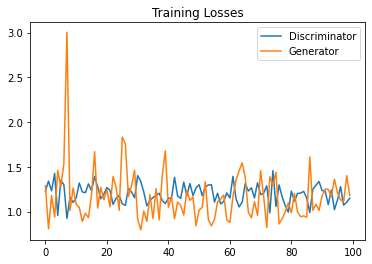

In [0]:
fig, ax = plt.subplots()
losses = np.array(losses)
plt.plot(losses.T[0], label='Discriminator')
plt.plot(losses.T[1], label='Generator')
plt.title("Training Losses")
plt.legend()

## Generator samples from training
Here we can view samples of images from the generator. First we'll look at the images we saved during training.

In [0]:
# helper function for viewing a list of passed in sample images
def view_samples(epoch, samples):
    fig, axes = plt.subplots(figsize=(7,7), nrows=4, ncols=4, sharey=True, sharex=True)
    for ax, img in zip(axes.flatten(), samples[epoch]):
        img = img.detach().cpu()
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)
        im = ax.imshow(img.reshape((28,28)), cmap='Greys_r')

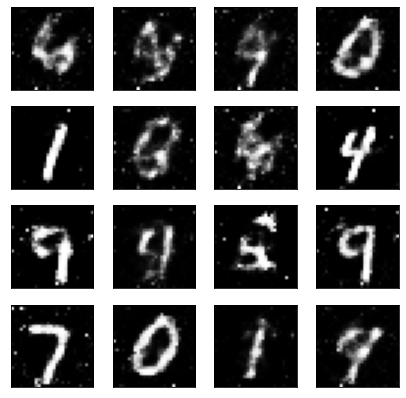

In [0]:
# Load samples from generator, taken while training
with open('train_samples.pkl', 'rb') as f:
    samples = pkl.load(f)

# -1 indicates final epoch's samples (the last in the list)
view_samples(-1, samples)

Below I'm showing the generated images as the network was training, every 10 epochs.

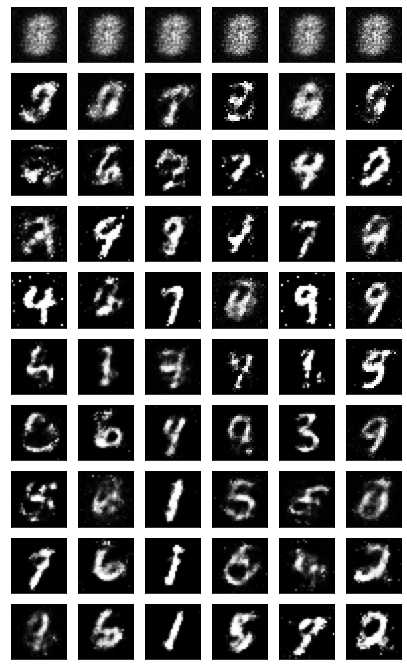

In [0]:
rows = 10 # split epochs into 10, so 100/10 = every 10 epochs
cols = 6
fig, axes = plt.subplots(figsize=(7,12), nrows=rows, ncols=cols, sharex=True, sharey=True)

for sample, ax_row in zip(samples[::int(len(samples)/rows)], axes):
    for img, ax in zip(sample[::int(len(sample)/cols)], ax_row):
        img = img.detach().cpu()
        ax.imshow(img.reshape((28,28)), cmap='Greys_r')
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

## Sampling from the generator
We can also get completely new images from the generator by using the checkpoint we saved after training. We just need to pass in a new latent vector $z$ and we'll get new samples!

It starts out as all noise. Then it learns to make only the center white and the rest black. You can start to see some number like structures appear out of the noise like 1s and 9s.


In [0]:
torch.save(G, 'SimpleMNISTGeneratorModel.pth')

/usr/local/lib/python3.6/dist-packages/torch/serialization.py:402: UserWarning: Couldn't retrieve source code for container of type Generator. It won't be checked for correctness upon loading.
  "type " + obj.__name__ + ". It won't be checked "


In [0]:
loaded_Gen = torch.load('SimpleMNISTGeneratorModel.pth')

In [0]:
# randomly generated, new latent vectors
sample_size=16
rand_z = np.random.uniform(-1, 1, size=(sample_size, z_size))
rand_z = torch.from_numpy(rand_z).float()

loaded_Gen.eval().cpu() # eval mode
# generated samples
rand_images = loaded_Gen(rand_z)

# 0 indicates the first set of samples in the passed in list
# and we only have one batch of samples, here
view_samples(0, [rand_images])